In [1]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
from pylab import rcParams

In [2]:
style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.001 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

print(confidence)

0.9969521502964045


In [3]:
forecast_set = clf.predict(X_lately)
print(forecast_set, confidence, forecast_out)



[1053.21733769 1026.64558397 1054.20806308 1006.53815489] 0.9969521502964045 4


In [4]:
df['Forecast'] = np.nan
df.tail(25)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-02-14,1072.70,2.393027,1.743304,2029979.0,1113.75,NaN
2018-02-15,1091.36,2.462066,0.730075,1806206.0,1109.90,NaN
2018-02-16,1095.50,1.529895,0.193894,1971928.0,1128.09,NaN
2018-02-20,1103.59,2.382225,0.991068,1646405.0,1143.70,NaN
2018-02-21,1113.75,2.575982,0.419259,2024534.0,1117.51,NaN
2018-02-22,1109.90,1.829895,-0.828292,1386115.0,1103.92,NaN
2018-02-23,1128.09,1.822550,0.842973,1234539.0,1071.41,NaN
2018-02-26,1143.70,1.299292,1.046066,1489118.0,1084.14,NaN
2018-02-27,1117.51,2.457249,-2.289936,2094863.0,1094.76,NaN


In [5]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400  #this is for 5 days (in seconds)
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400   #5 days
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df.head(20)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,53.164113,NaN
2004-08-20,54.322689,7.921706,7.227007,22834300.0,54.122070,NaN
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,53.239345,NaN
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,51.162935,NaN
2004-08-25,53.164113,3.886792,1.183658,9188600.0,51.343492,NaN
2004-08-26,54.122070,3.048837,2.820391,7094800.0,50.280210,NaN
2004-08-27,53.239345,2.760245,-1.803885,6211700.0,50.912161,NaN
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,50.159839,NaN
2004-08-31,51.343492,1.514115,0.048866,4917800.0,50.947269,NaN


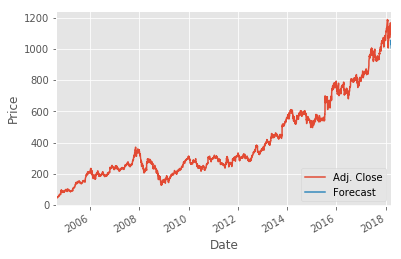

<Figure size 3600x1440 with 0 Axes>

In [6]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(50,20))
rcParams['figure.figsize'] = 5, 10
plt.show()